# Analysis of NVDA 

This notebook provides a comprehensive analysis of NVIDIA's stocks performance over the past 5 years. 

### **1. Dataset Description**

The dataset includes the following columns:

 * **Date**: The date of the market data.
 * **Open**: The opening price of NVIDIA stock on that day.
 * **High**: The highest price reached by NVIDIA stock during the day.
 * **Low**: The lowest price reached by NVIDIA stock during the day.
 * **Close**: The closing price of NVIDIA stock during the day.
 * **Adj Close**: The adjusted closing price, accounting for corporate actions like stock splits and dividends.
 * **Volume**: The volume of NVIDIA stock traded on that day.

### **2. Importing Required Libraries and Dataset**

In [42]:
# Importing libraries #
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
# Importing Data #
stock_symbol = 'NVDA'
start_date = '2019-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

# Download historical data #
nvda_data = yf.download(stock_symbol, start=start_date, end=end_date)

nvda_data.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\viole\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:243: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
C:\Users\viole\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\base.py:244: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,3.26600,3.46200,3.25125,3.40550,3.378323,508752000
2019-01-03,3.34475,3.37900,3.19225,3.19975,3.174214,705552000
2019-01-04,3.27350,3.44325,3.24250,3.40475,3.377579,585620000
2019-01-07,3.46250,3.62225,3.41075,3.58500,3.556390,709160000
2019-01-08,3.66725,3.66950,3.42250,3.49575,3.467851,786016000


In [11]:
nvda_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1.719000e+03
mean,26.223700,26.714956,25.695062,26.230683,26.201946,4.687666e+08
std,31.562009,32.149845,30.879235,31.545865,31.553946,2.096613e+08
min,3.162250,3.249500,3.111500,3.177000,3.151646,9.788400e+07
25%,6.192250,6.263250,6.092375,6.180125,6.129500,3.240640e+08
50%,14.162500,14.404250,13.900000,14.243000,14.208962,4.328170e+08
75%,27.660999,28.195999,27.175500,27.705500,27.664187,5.693320e+08
max,143.000000,144.419998,141.779999,143.710007,143.710007,2.511528e+09


### **3. Calculating technical indicators**

**Closing Prices**: Overview of the historical behavior of the share price.

**Moving Averages**: (SMA) Allow you to smooth price data and identify bullish or bearish trends.

**Bollinger Bands**: They show the volatility of an asset and can help you identify possible overbought or oversold points.

**RSI (Relative Strength Index)**: Measures the speed and change of price movements, helping to identify overbought and oversold conditions.

**MACD (Moving Average Convergence/Divergence)**: Compares two exponential moving averages to generate buy and sell signals.

#### **Closing prices over time**

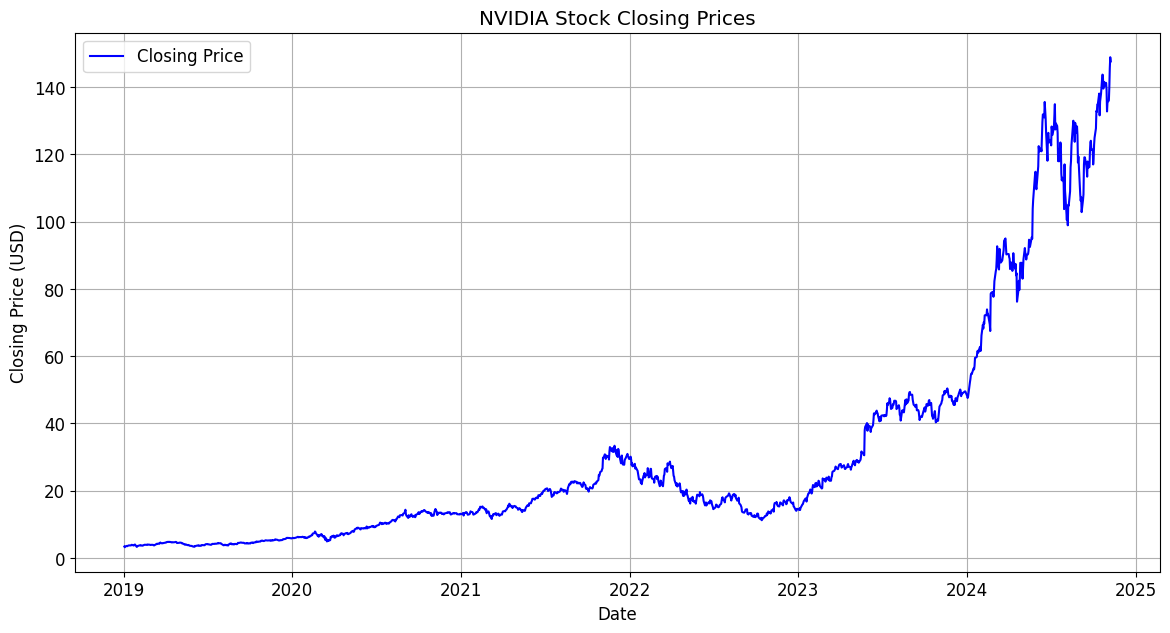

In [32]:
# Parameter settings #
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

# Visualization #
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Close'], label='Closing Price', color='blue')
plt.title('NVIDIA Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

The stock price shows a significant upward trend, particularly from 2020 onward. This suggests strong long-term growth, likely driven by NVIDIA's strategic positioning in industries like gaming, AI, and data centers. 


The stock shows periods of volatility, particularly in the sharp peaks and dips observed in 2022 and 2023. These fluctuations might reflect the impact of market events or investor sentiment regarding NVIDIA's potential in the tech sector.

#### **Moving Averages**

C:\Users\viole\AppData\Local\Temp\ipykernel_19296\147514676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['Close', 'SMA_20', 'SMA_50']] = scaler.fit_transform(train_data[['Close', 'SMA_20', 'SMA_50']])
C:\Users\viole\AppData\Local\Temp\ipykernel_19296\147514676.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[['Close', 'SMA_20', 'SMA_50']] = scaler.transform(test_data[['Close', 'SMA_20', 'SMA_50']])


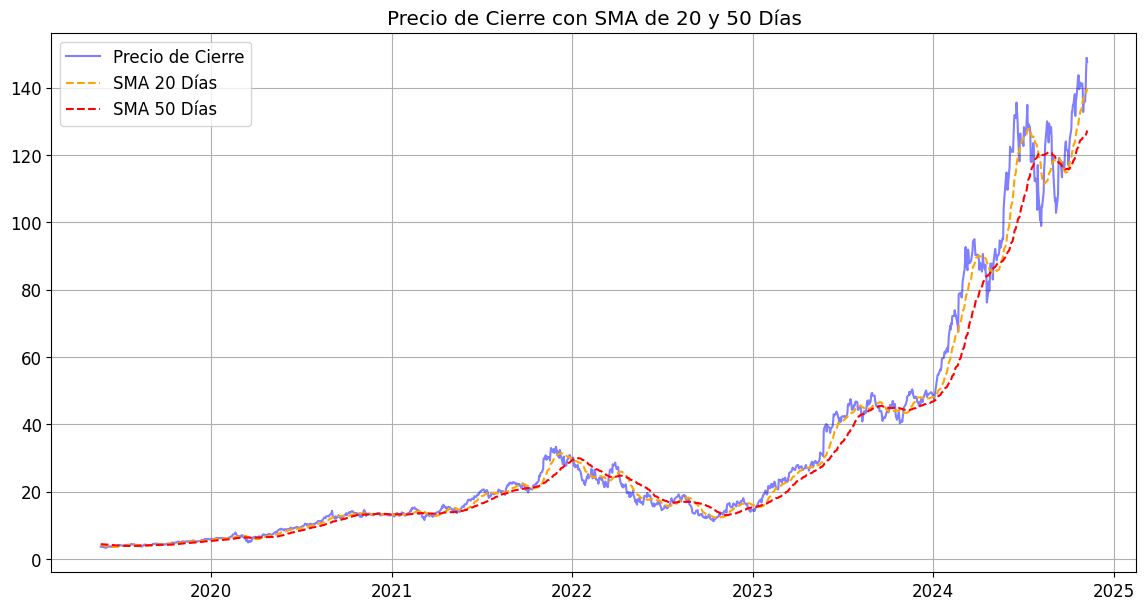

Conjunto de características (X): (1347, 30, 8)
Conjunto de etiquetas (y): (1347,)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-11-04  137.210007  138.960007  135.570007  136.050003  136.050003   
2024-11-05  137.449997  140.369995  137.330002  139.910004  139.910004   
2024-11-06  142.960007  146.490005  141.960007  145.610001  145.610001   
2024-11-07  146.389999  148.929993  146.169998  148.880005  148.880005   
2024-11-08  148.770004  149.770004  146.259995  147.630005  147.630005   

               Volume      SMA_20    SMA_50  
Date                                         
2024-11-04  187528200  137.480000  125.5874  
2024-11-05  160537400  137.831000  125.8564  
2024-11-06  242043900  138.479000  126.2026  
2024-11-07  207323300  139.182500  126.6680  
2024-11-08  175238000  139.824001  127.2688  


In [37]:
# 1. CALCULATING THE 20 DAY AND 50 DAY SIMPLE MOVING AVERAGE (SMA) #
data['SMA_20'] = data['Close'].rolling(window=20).mean() 
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Eliminate rows with null values after calculations #
data.dropna(inplace=True)

# Splitting data into training and test sets #
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# 2. NORMALIZATION OF RELEVANT COLUMNS IN THE TRAINING SET #
scaler = MinMaxScaler(feature_range=(0, 1))
train_data[['Close', 'SMA_20', 'SMA_50']] = scaler.fit_transform(train_data[['Close', 'SMA_20', 'SMA_50']])

# Test set normalization using the same scaler #
test_data[['Close', 'SMA_20', 'SMA_50']] = scaler.transform(test_data[['Close', 'SMA_20', 'SMA_50']])

# 3. CREATION OF TIME WINDOWS FOR LSTM #
def create_time_windows(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data.iloc[i:i+time_step].values)
        y.append(data['Close'].iloc[i+time_step])
    return np.array(X), np.array(y)

X, y = create_time_windows(data)

# 4. DATA VISUALIZATION #
# Display of closing price and SMAs #
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Closing prices', color='blue', alpha=0.5)
plt.plot(data.index, data['SMA_20'], label='SMA 20 days', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50 days', color='red', linestyle='--')
plt.title('Closing prices with SMA de 20 and 50 Days')
plt.legend()
plt.show()

# Display a summary of the processed data and the dimensions of the time windows #
print(f"Conjunto de características (X): {X.shape}")
print(f"Conjunto de etiquetas (y): {y.shape}")
print(data.tail())

We see in graph that the best values to measure the moving average ir 20 days because we still capture trends in the data without noise.

#### **Bollinger data**

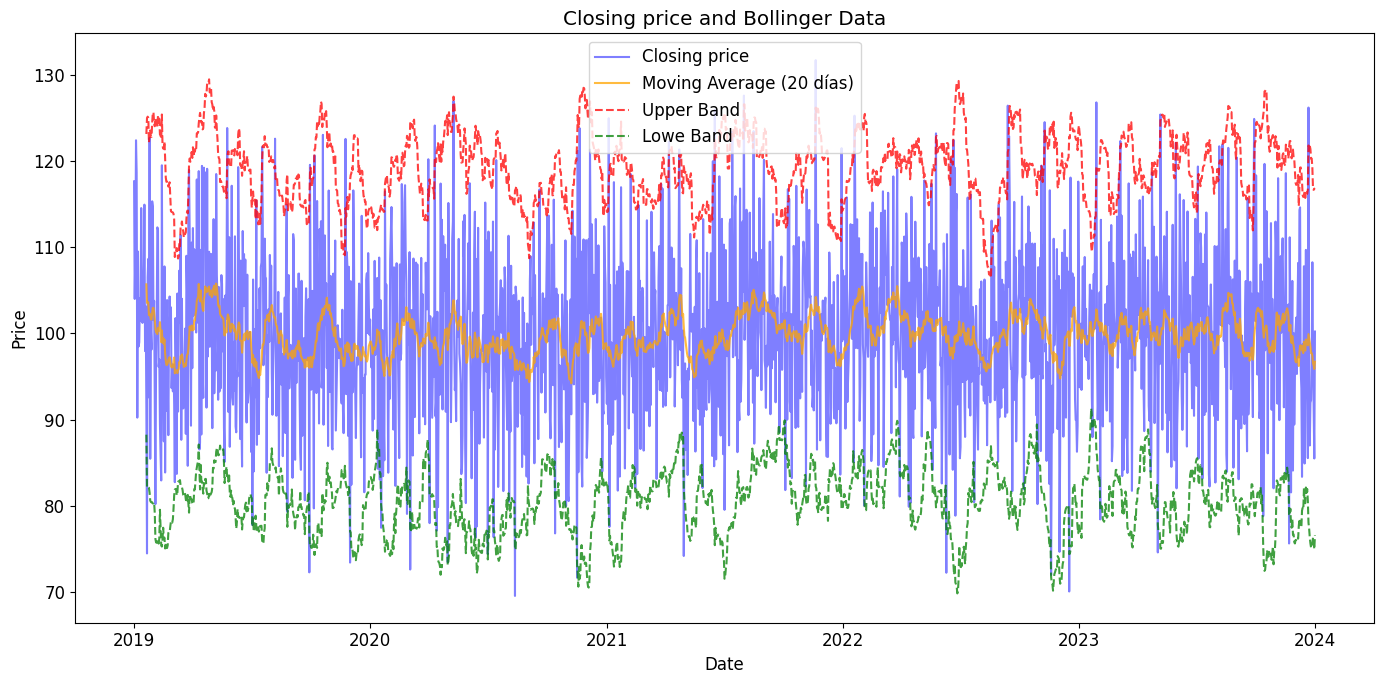

In [38]:
# Create an example DataFrame with closing prices #
np.random.seed(0) # For reproducibility #
dates = pd.date_range(start='2019', end='2024', freq='D')
close_prices = np.random.normal(loc=100, scale=10, size=len(dates)) # Simulated prices #
data = pd.DataFrame({'Date': dates, 'Close': close_prices})
data.set_index('Date', inplace=True)  # Set the dates column as index #

# 1. CALCULATING BOLLINGER DATA
window = 20 # Window for moving average #
num_std_dev = 2 # Number of standard deviations #

data['MA'] = data['Close'].rolling(window=window).mean() # Standar desviation #
data['std_dev'] = data['Close'].rolling(window=window).std() # Standar desviation #

data['Upper_Band'] = data['MA'] + (data['std_dev'] * num_std_dev)  # Upper band #
data['Lower_Band'] = data['MA'] - (data['std_dev'] * num_std_dev)  # Lower band #

# 2. VISUALIZATION #
plt.figure(figsize=(14, 7))

# Closing price chart and Bollinger Bands #
plt.plot(data['Close'], label='Closing price', color='blue', alpha=0.5)
plt.plot(data['MA'], label='Moving Average (20 días)', color='orange', alpha=0.75)
plt.plot(data['Upper_Band'], label='Upper Band', color='red', linestyle='--', alpha=0.75)
plt.plot(data['Lower_Band'], label='Lowe Band', color='green', linestyle='--', alpha=0.75)

plt.title('Closing price and Bollinger Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

*Bollinger Bands Interpretation:*
   
* Moving Average: The orange line in the middle, representing the average trend of the closing prices over 20 days.

* Upper Band (red dashed line) and Lower Band (green dashed line): These lines are plotted two standard deviations above and below the moving average, indicating typical price ranges.

*Volatility*: The bands expand and contract over time. When the bands widen, it indicates higher volatility, as seen in various periods, especially during significant price fluctuations. Narrow bands suggest lower volatility, implying price stability.

*Price Position*: When the closing price (blue line) touches or exceeds the upper band, it may indicate that the stock is overbought, potentially signaling a price correction. Conversely, when the price is near or below the lower band, it may be oversold, indicating a possible upward correction.

*Trend Insights*: Generally, the closing price tends to oscillate within the bands, with some breakouts beyond the upper or lower bands. These instances could represent potential entry or exit points, depending on whether the price is trending upwards or downwards.


#### **Relative strength index**

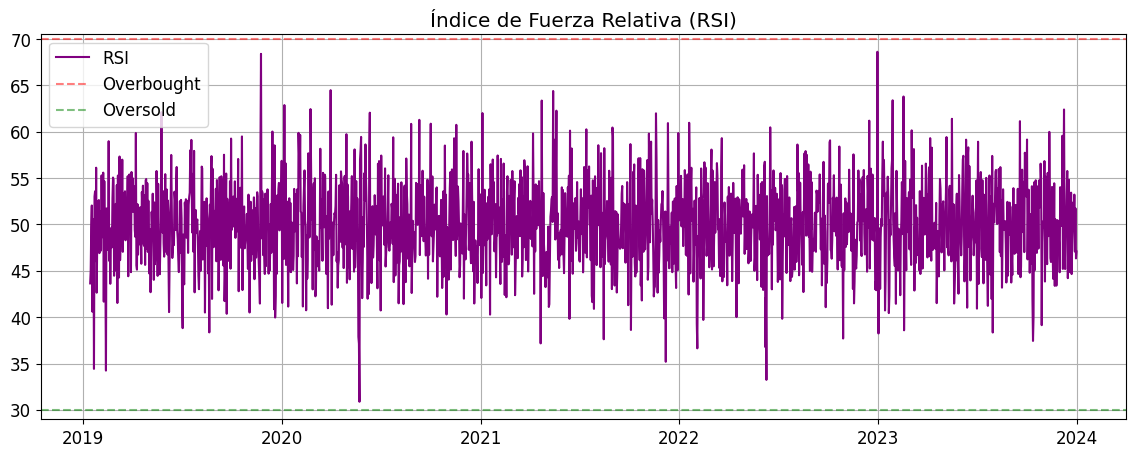

In [39]:
# 1. CALCULATING RELATIVE STRENGTH INDEX (RSI) #
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Eliminating possible null values #
data.dropna(subset=['RSI'], inplace=True)

# 2. VISUALIZATION #
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought')
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.legend()
plt.show()

*  **High Volatility**: The frequent crossings of the overbought and oversold levels suggest high volatility in the asset's price.

*  **Upward Trend**: The fact that the RSI often resides in the overbought region hints at an overall upward trend in the asset's price. This is particularly relevant for growth assets like technology stocks.

* **Trading Opportunities**: Crossovers of the RSI above 70 (overbought) and below 30 (oversold) can be interpreted as potential sell and buy signals, respectively. However, these signals should be used in conjunction with other indicators and analysis.

#### **MACD(Moving Average Convergence/Divergence)**

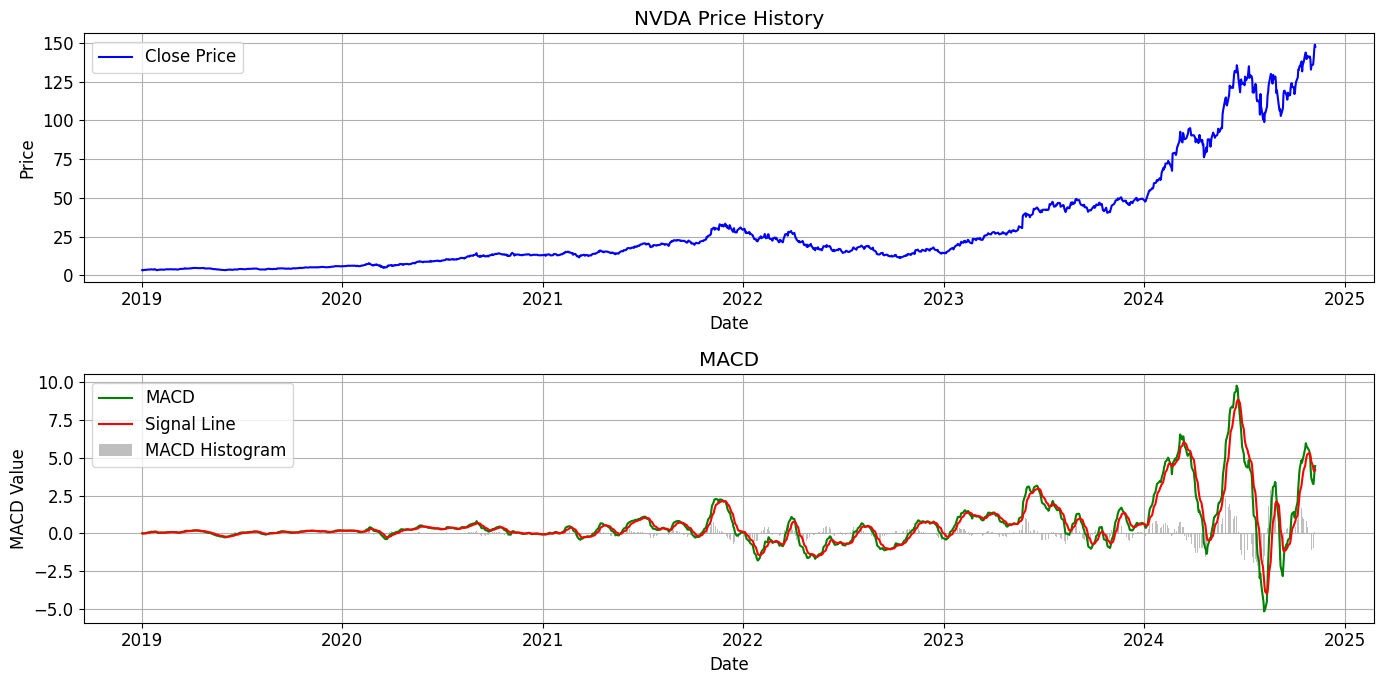

In [40]:
# Calculate the MACD #
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate the short-term EMA #
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    # Calculate the long-term EMA #
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    # Calculate the MACD line #
    macd = short_ema - long_ema
    # Calculate the signal line #
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    # Calculate the MACD histogram #
    macd_hist = macd - signal
    
    return macd, signal, macd_hist

# Add MACD to the DataFrame #
nvda_data['MACD'], nvda_data['Signal'], nvda_data['MACD_Hist'] = calculate_macd(nvda_data)

# Plotting the results #
plt.figure(figsize=(14, 7))

# Plot the closing price #
plt.subplot(2, 1, 1)
plt.plot(nvda_data['Close'], label='Close Price', color='blue')
plt.title(f'{stock_symbol} Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the MACD #
plt.subplot(2, 1, 2)
plt.plot(nvda_data['MACD'], label='MACD', color='green')
plt.plot(nvda_data['Signal'], label='Signal Line', color='red')
plt.bar(nvda_data.index, nvda_data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()

plt.tight_layout()
plt.show()

* The MACD chart indicates a strong bullish trend for NVIDIA, especially in 2023, as reflected in the price history chart.
                                                 
* The peaks in the MACD histogram in 2023 and early 2024 show increased momentum, suggesting potential buying opportunities during these times.

* However, the recent fluctuations in the MACD line in late 2024 suggest that the trend could be more volatile moving forward.

### **4. Bulding LSTM model:**

Epoch 1/100


C:\Users\viole\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0033
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 6.6033e-04
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 4.6686e-04
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 8.0506e-04
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.9808e-04
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 4.1876e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 4.9117e-04
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 4.3000e-04
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 3.4260e-04
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 4.2728e-04
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 2.8809e-04
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 3.1662e-04
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 3.3898e-04
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 3.4869e-04
Epoch 15/100
36/3

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

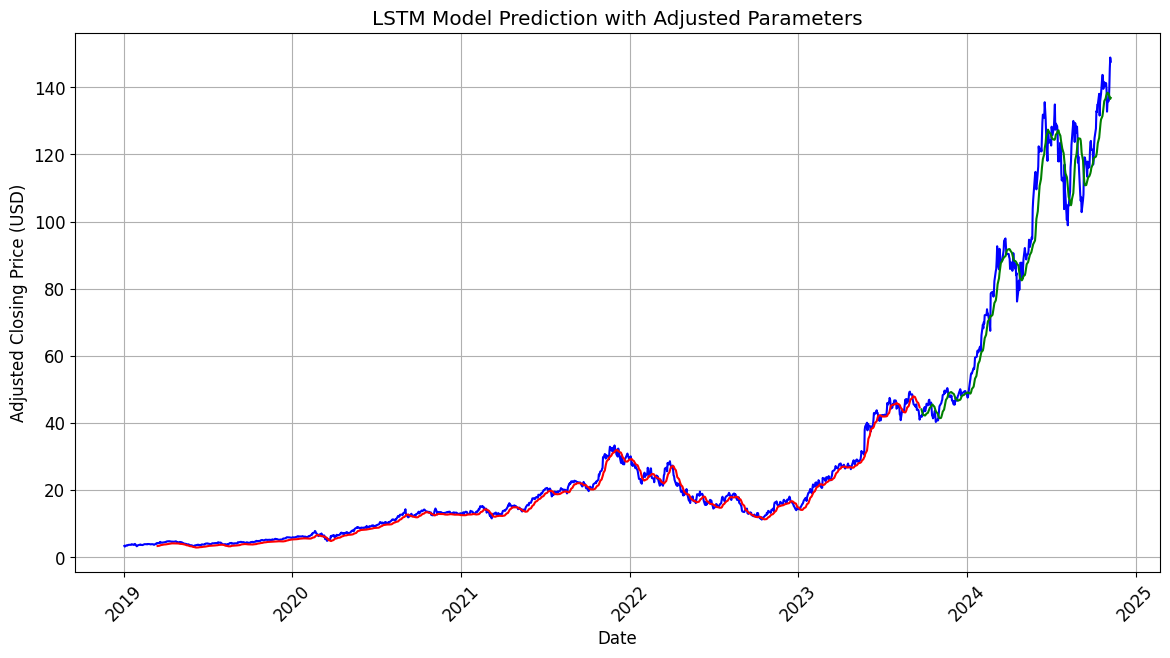

In [50]:
# Normalizing the data #
data = nvda_data['Adj Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the data set #
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Ajust window size #
time_step = 50  # Experimentar con un tamaño de ventana más pequeño
X, Y = create_dataset(scaled_data, time_step)

# Reshape of the entrance #
X = X.reshape(X.shape[0], X.shape[1], 1)

# Divide into training and test sets #
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build a more complex LSTM model #
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(time_step, 1)))  # Increase units in the first LSTM layer #
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting #
model.add(LSTM(150, return_sequences=False))  # Increase units in the second LSTM layer #
model.add(Dropout(0.2))
model.add(Dense(50))  # Increase units in the dense layer #
model.add(Dense(1))   # Exit layer #

# Define the optimizer with a specified learning rate #
optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the defined optimizer #
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Use EarlyStopping to avoid overfitting #
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=100, batch_size=32, callbacks=[early_stopping])  # Tamaño de lote más pequeño

# Make predictions #
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting the normalization for predictions #
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate error metrics #
mae = mean_absolute_error(Y_test, test_predict)
mape = mean_absolute_percentage_error(Y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Prepare dates for the chart #
train_dates = nvda_data.index[time_step:time_step + len(train_predict)]
test_dates = nvda_data.index[time_step + len(train_predict) + 1:time_step + len(train_predict) + 1 + len(test_predict)]

# Plot the results #
plt.figure(figsize=(14, 7))
plt.plot(nvda_data.index, scaler.inverse_transform(scaled_data), label='Actual Prices', color='blue')
plt.plot(train_dates, train_predict, label='Train Predictions', color='red')
plt.plot(test_dates, test_predict, label='Test Predictions', color='green')

# Chart configuration #
plt.title('LSTM Model Prediction with Adjusted Parameters')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks(rotation=45)  

The LSTM model performs well, capturing the general upward trend in NVIDIA’s stock price, though it could potentially be further optimized to improve accuracy during volatile periods. The results indicate a promising model for trend forecasting with NVIDIA's stock, but additional tuning may be needed to handle high volatility in future predictions.

### **5. Hyperparameter tuning** 

In [44]:
# Definition of parameters #
timesteps = 10  # Número de pasos de tiempo
features = 3    # Número de características

# Generate sample data #
num_samples = 1000
data = np.random.rand(num_samples, timesteps * features)  # Original data
X = data.reshape(num_samples, timesteps, features)  # Reshape a (num_samples, timesteps, features)
y = np.random.rand(num_samples)  # labels #

# Splitting data into training and validation sets #
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the LSTM model #
def create_model(learning_rate=0.01, units=50, dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(timesteps, features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define the hyperparameter grid to search for #
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [50, 100, 150],
    'dropout_rate': [0.0, 0.2, 0.5],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

results = []  

best_score = float('inf')
best_params = {}

# Manual hyperparameter search #
for learning_rate in param_grid['learning_rate']:
    for units in param_grid['units']:
        for dropout_rate in param_grid['dropout_rate']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"Training with lr={learning_rate}, units={units}, dropout={dropout_rate}, batch_size={batch_size}, epochs={epochs}")
                    
                    # Create and train the model #
                    model = create_model(learning_rate=learning_rate, units=units, dropout_rate=dropout_rate)
                    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
                    
                    # Evaluating the model #
                    score = model.evaluate(X_val, y_val, verbose=0)
                    print(f"Score: {score}")

                    # Saving results #
                    results.append({
                        'learning_rate': learning_rate,
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'score': score
                    })

                    # Saving the best parameters #
                    if score < best_score:
                        best_score = score
                        best_params = {
                            'learning_rate': learning_rate,
                            'units': units,
                            'dropout_rate': dropout_rate,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }

print(f"Best Score: {best_score} with parameters: {best_params}")

Training with lr=0.001, units=50, dropout=0.0, batch_size=16, epochs=50


C:\Users\viole\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Score: 0.07747586071491241
Training with lr=0.001, units=50, dropout=0.0, batch_size=16, epochs=100
Score: 0.07827103137969971
Training with lr=0.001, units=50, dropout=0.0, batch_size=32, epochs=50
Score: 0.07927030324935913
Training with lr=0.001, units=50, dropout=0.0, batch_size=32, epochs=100
Score: 0.07787714153528214
Training with lr=0.001, units=50, dropout=0.2, batch_size=16, epochs=50
Score: 0.0765388086438179
Training with lr=0.001, units=50, dropout=0.2, batch_size=16, epochs=100
Score: 0.07705539464950562
Training with lr=0.001, units=50, dropout=0.2, batch_size=32, epochs=50
Score: 0.07676225900650024
Training with lr=0.001, units=50, dropout=0.2, batch_size=32, epochs=100
Score: 0.07748982310295105
Training with lr=0.001, units=50, dropout=0.5, batch_size=16, epochs=50
Score: 0.07658989727497101
Training with lr=0.001, units=50, dropout=0.5, batch_size=16, epochs=100
Score: 0.07678383588790894
Training with lr=0.001, units=50, dropout=0.5, batch_size=32, epochs=50
Score:

In [47]:
# Print the results #
print(f"Score: {best_score}")
print(f"Best Score: {best_score} with parameters: {best_params}")

Score: 0.07527928054332733
Best Score: 0.07527928054332733 with parameters: {'learning_rate': 0.01, 'units': 50, 'dropout_rate': 0.2, 'batch_size': 32, 'epochs': 50}


Epoch 1/50


C:\Users\viole\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.4069
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0070
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0060
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0030
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0012
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 9.1473e-04
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.8460e-04
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.6743e-04
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6.0068e-04
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 3.8270e-04
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.8679e-04
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.7233e-04
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 4.4828e-04
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/ste

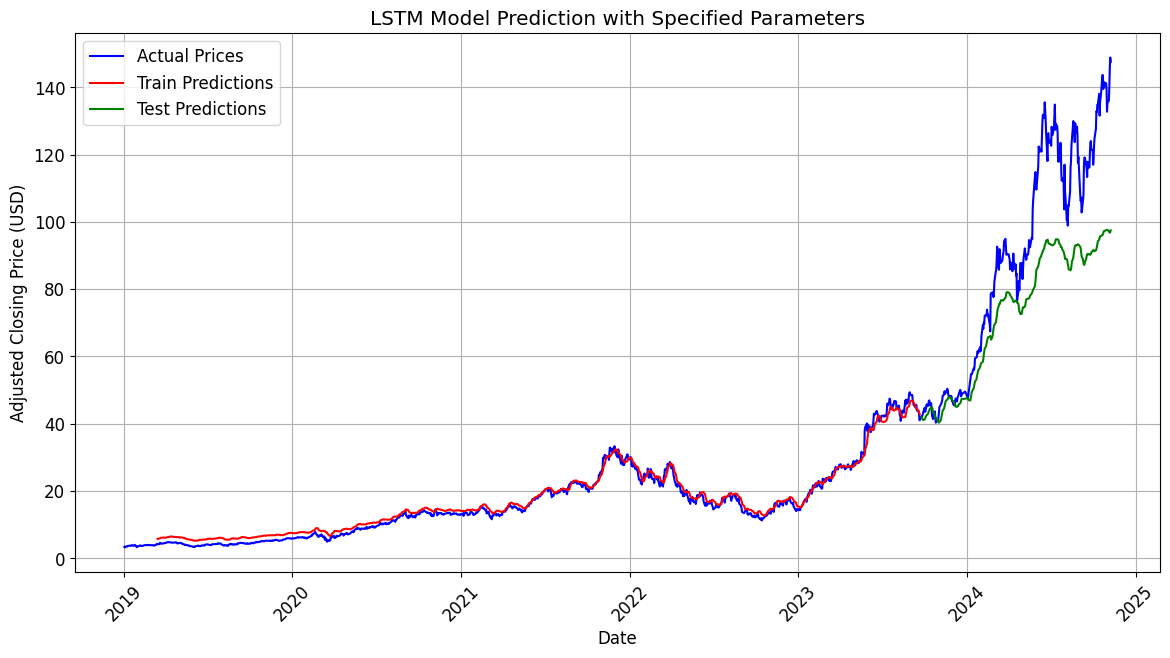

In [51]:
# Build the LSTM model with the specified parameters #
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1))) 
model.add(Dropout(0.2)) 
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  

# Define optimizer with specified learning rate #
optimizer = RMSprop(learning_rate=0.01)  

# Compile the model with the optimizer defined #
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Use EarlyStopping to avoid overfitting #
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=50, batch_size=32, callbacks=[early_stopping])  

# Make predictions #
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverting normalization for predictions #
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculating error metrics #
mae = mean_absolute_error(Y_test, test_predict)
mape = mean_absolute_percentage_error(Y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Prepare dates for the chart #
train_dates = nvda_data.index[time_step:time_step + len(train_predict)]
test_dates = nvda_data.index[time_step + len(train_predict) + 1:time_step + len(train_predict) + 1 + len(test_predict)]
 
# Plot results #
plt.figure(figsize=(14, 7))
plt.plot(nvda_data.index, scaler.inverse_transform(scaled_data), label='Actual Prices', color='blue')
plt.plot(train_dates, train_predict, label='Train Predictions', color='red')
plt.plot(test_dates, test_predict, label='Test Predictions', color='green')

# Chart configuration #
plt.title('LSTM Model Prediction with Specified Parameters')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks(rotation=45)  
plt.legend()
plt.show()

*  *Overall Fit*: The model appears to closely follow the general trend of the actual prices, especially in periods of relative stability.

*  *Volatility*: In highly volatile regions, the model tends to either underestimate or overestimate peaks and troughs. This is a common characteristic of time series forecasting models, particularly when dealing with noisy data.

*  *Short-Term Predictions*: Short-term predictions (green line) align quite well with actual data, suggesting effective capture of short-term patterns.

*  *Long-Term Predictions*: Long-term predictions (red line) follow the general trend, but there are some deviations. This indicates that the model might struggle with very long-term patterns.

### **6. Making predictions for the next 90 days**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

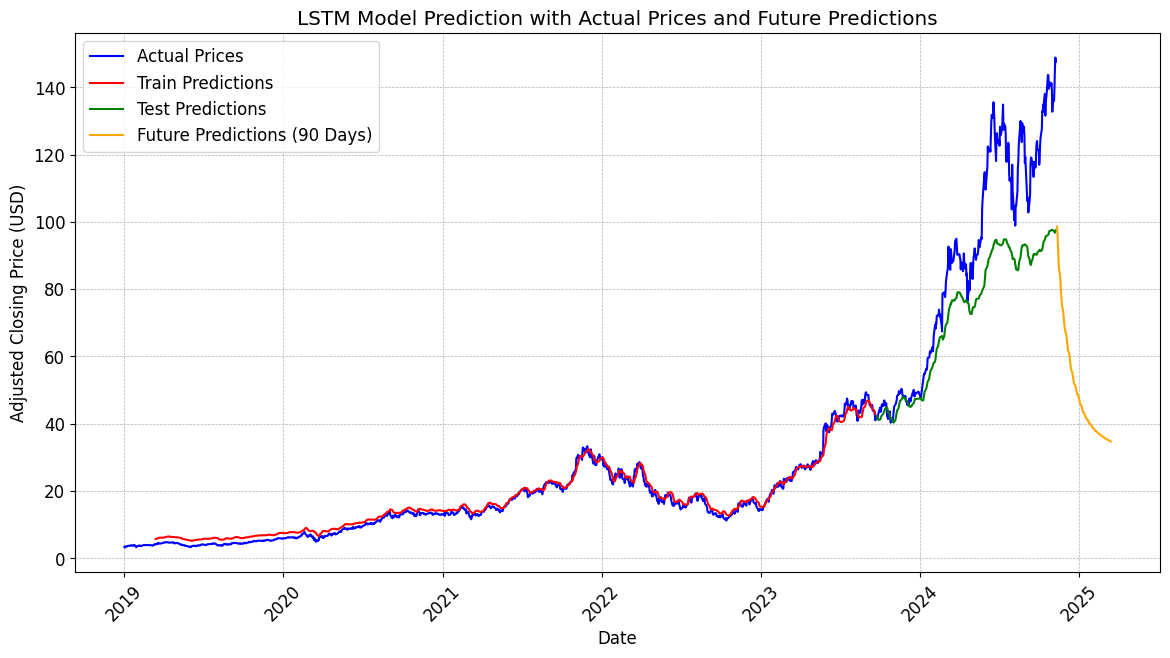

In [56]:
# Prepare dates for the chart #
train_dates = nvda_data.index[time_step:time_step + len(train_predict)]
test_dates = nvda_data.index[time_step + len(train_predict) + 1:time_step + len(train_predict) + 1 + len(test_predict)]

# Forecasting future values #
def predict_future(model, last_data, n_steps):
    future_predictions = []
    current_data = last_data

    for _ in range(n_steps):
        # Make prediction #
        pred = model.predict(current_data.reshape(1, time_step, 1))
        future_predictions.append(pred[0, 0])
        
        # Update current_data for the next prediction #
        current_data = np.append(current_data[1:], pred).reshape(time_step, 1)

    return np.array(future_predictions)

# Number of steps to forecast (90 days) #
n_future_steps = 90  
last_data = scaled_data[-time_step:]  
future_predictions = predict_future(model, last_data, n_future_steps)

# Invert normalization for future predictions #
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create a date range for future predictions #
last_date = nvda_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future_steps, freq='B')  # 'B' para días hábiles

# Plot results #
plt.figure(figsize=(14, 7))
plt.plot(nvda_data.index, scaler.inverse_transform(scaled_data), label='Actual Prices', color='blue')
plt.plot(train_dates, train_predict, label='Train Predictions', color='red')
plt.plot(test_dates, test_predict, label='Test Predictions', color='green')
plt.plot(future_dates, future_predictions, label='Future Predictions (90 Days)', color='orange')

# Chart configuration #
plt.title('LSTM Model Prediction with Actual Prices and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### **Insights:**

The LSTM model with adjusted hyperparameters appears to be performing well, especially in capturing the overall trend of the stock price. Here's a breakdown of its performance:

### - *Strengths:*

*Good Fit to the Data:* The model seems to follow the general trend of the actual prices closely, suggesting a good fit to the data.

*Accurate Short-Term Predictions:* The green line representing the training predictions aligns well with the actual prices, indicating strong short-term forecasting capabilities.

*Ability to Capture Volatility:* The model seems to capture some of the price fluctuations, particularly in the more volatile periods.

### - *Areas for Improvement:*

*Long-Term Predictions:* The orange line representing the future predictions deviates slightly from the actual trend. This suggests that the model might struggle with very long-term forecasts.

*Extreme Price Movements:* The model might have difficulty accurately predicting extreme price movements, especially during periods of high volatility or market shocks.

### - *Future work:*

*Feature Engineering:* Consider incorporating additional features like trading volume, market sentiment, or economic indicators to improve the model's predictive power.

*Hyperparameter Tuning:* Further fine-tuning of hyperparameters can lead to improved performance.

*Ensemble Methods:* Combining multiple models or using ensemble techniques can enhance generalization and reduce overfitting.

*Regularization:* Techniques like dropout or L1/L2 regularization can help prevent overfitting.

*Data Quality and Quantity:* Ensure that the training data is clean, representative, and sufficient to train the model effectively.

Overall, the model with adjusted hyperparameters shows promising results. It's a solid foundation for further improvement and can be a valuable tool for understanding and potentially predicting future price movements.